# **CHAPTER 7 신경망,딥러닝**

딥러닝=심층학습?

*  기계학습의 한 방법
-신경망 모델이라고 불리는 뇌의 신경 네트워크에서 아이디어를 얻은 알고리즘
-신경망 모델 중에서도 "층을 많이 활용한 모델" = 딥러닝

딥러닝=심층신경망(deep neural network,DNN)
*   1950,80년대 연구 붐이 일었지만 성능이 잘 나오지않아 실용화X
-토론토 대학의 제프리 힌튼교수팀의 신경망 모델이 2012 ILSVRC(대규모이미지경연대회) 우승
-현재는 신경망의 3차 붐



# **7.1 뉴런모델**
*  신경망 모델은 "뉴런"모델 단위로 구축 ->뇌의 신경세포에서 힌트를 얻어 만들어진 수학적 모델이기 때문



> 7.1.1 신경세포



축삭
*  신경세포는 축삭이라는 케이블(뉴런에서 뻗어나온 가지)을 가지고있음->이를 사용해 전기적 펄스를 다른 신경세포에 전달
-이때 "시냅스(synapse)"라는 인터페이스를 통해 펄스를 신경세포에 전달

신경세포
*  다른세포에서 전기적 펄스를 받으면 세포의 전기적 레벨,전위(electric potential)가 오르락 내리락 함
-synapse는 전위를 올리는 방향or내리는방향으로 작동하는지 정해지는 종류가 있음.
-얼마나 오르내릴지는 입력을 받는 synapse의 상태(synapse의 전달강도)에 따라 다름.
-ex)synapse 전달 강도가 크면->1개의 펄스가 와도 전위가 크게변화 /synapse전달강도가 작으면 ->전위는 거의 변하지않음
-전위는 위와 같이 입력의 영향으로 항상 오르락 내리락
-IF 전위가 일정한 값(한계)를 초과하면 신경세포는 전기적인 펄스를 발신하고 펄스는 축삭을 타고 다음 신경세포로 전달

우리의 학습을 다양한 신경세포간의 synapse 전달강도의 변화에 따라 일어나는것으로 생각할 수 있음

ex)우리가 삶에서 얻는 학습들은 각각을 담당하는 뇌부위의 synapse 전달 강도가 변화하여 일어나는것으로 이해하면됨.




> 7.1.2 뉴런 모델
앞서 배운 신경세포의 움직임을 단순화한 수학적 모델인 뉴런모델



**뉴런에 2개의 입력 $x=(x_0,x_1)$가 들어온다고 가정**

*  입력값은 양수와 음수값을 가질 수 있는 실수
-각 입력에 대한 synapse 전달정도(=가중치 = 하중)를 $w_0,w_1$로
-이들을 곱하여 모든 입력으로 합을 얻은 상수 $w_2$를 입력총합(막전위,Logit)a라고 한다.
-$w_2$은 절편을 나타내는 매개변수(bias parameter, bias 항), 항상 1을 갖는 3번째 $x_2$가 있다고 가정
-시그마로 간단히 표현 가능

$$입력총합,logit,a =w_0x_0 + w_1x_1+w_2 = \displaystyle\sum_{i=0}^{2} w_ix_i$$

*  x2=더미 입력(바이어스입력), 입력총합 a 에 시그모이드 함수 정굥한 값을 뉴런의 출력값 y로 설정

$$a= \frac{1}{1+exp(-a)}$$

*  y=0~1까지 연속된값(시그모이드)
-실제 신경세포와 달리 출력값은 단위 시간당 펄스 수(발화 빈도)를 나타내고있다고 가정하자.
-a가 클수록 발화빈도는 한계값인 1에 가까워짐/a가 음의 큰값을 취할수록 발화빈도는 0에 가까워지며 거의 발화하지않은 상태가 된다.

**입출력 맵**

*  앞선 식으로 정의된 뉴런모델=로지스틱 회귀모델
-이 뉴런모델은 2차원의 입력공간(x0,x1)을 직선으로 나누어 한쪽에 0~0.5의 값을 다른 한쪽에는 0.5에서 1 사이의 숫자를 할당하는 기능을 가짐.
-이러한 모델을 "입출력맵"이라고 한다.
-입력공간에 대한 입력총합은 평면으로 표시되며, 입력 총합이 0이 되는것은 직선 $w_0x_0 +w_1x_1+w_2=0$이 된다.
-직선을 기준으로 나누어지는 한쪽영역은 양수, 다른 한쪽은 음수다.
-출력은 입력총합의 평면을 시그모이드에 적용->입력총합의 평면을 범위 0~1 사이에 눌러뭉갠 모양이 된다. 
-입력총합이 0인 직선상의 입력은 출력에서는 0과 1의 사이인 0.5가 된다.

**입력차수에 2 대신 'D'를 적용한 일반적인 경우는 다음과 같다.**

$$a=\displaystyle\sum_{i=0}^{2} w_ix_i$$

$$a= \frac{1}{1+exp(-a)}$$

*  $x_D$는 항상 1의 값을 가지는 더미 입력
-뉴런모델은 D차원의 입력공간을 D-1차원 공간에서 2개로 나누는 것이다.

**선형로지스틱회귀모델복습, N개의 데이터셋($x_n,t_n$)에 대한 뉴런 모델 학습 방법 확인**
*  목적함수=평균 교차 엔트로피 오차
$$E(w)=-\frac{1}{N}\displaystyle\sum_{i=0}^{N-1} {t_niny_n +(1-t_n)in(1-y_n)}$$

*  이 오차함수의 매개변수에 대한 기울기는
$$\frac{∂E}{∂W_i}=\frac{1}{N}\displaystyle\sum_{i=0}^{N-1} (y_n -t_n)x_{ni}$$
*  매개변수의 학습 법칙은 그 기울기를 사용하여 다음과 같은 식이 된다.
$$w_i(t+1)=w_i(t) - α\frac{∂E}{∂W_i}$$

# **7.2 신경망 모델**



# what is feedforward neural network(순방향 신경망)?
>>*  순방향 신경망 노드 간의 연결이 순환을 형성하지 "않는" 인공신경망이다.(RNN 과의 차이)
*  인공신경망 최초의 가장 단순한 형태
*  이러한 네트워크에서 정보는 입력노드->출력노드 방향으로 한방향(=전방향)으로만 움직임, 숨겨진 노드가 있는 경우 이를 경유한다.
*  네트워크 안에 순환이나 루프는 존재하지않는다.  







> 7.2.1 2층 피드 포워드 신경망

*  뉴런모델 하나는 입력공간을 선으로 나눈다는 단순한 기능
-하지만 많이 조합하면 강력한 힘을 발휘->뉴런의 집합체모델=신경망모델(=신경망)이라 한다.
-신경망모델은 여러종류가 있지만 여기서는 신호가 되돌아가는 경로가 없이 한 방향으로 흐르는 feedforward neural network model 을 다룬다.


2차원의 입력을 3개의 뉴런으로 출력하는 예시
*  2차원에서 주어진 수치를 3개의 카테고리로 분류할 수있음
-각 출력 뉴런의 출력값이 각 카테고리에 속할 확률을 나타내도록 학습

**네트워크를 수식으로 살펴보자**
*  입력은 2차원, 항상 1을 가지는 더미 x2가 더해져 중간층 두 뉴런에 정보가 전달
-i번째 입력부터 j번째  뉴런에 대한 가중치를 $w_{ij}$라고 하고 j번쨰 입력총합은 $b_j$로 한다.
$$b_j =\displaystyle\sum_{i=0}^{2} {w_{ji}x_i} $$

*  가중치$ w_{ji}$의 인덱스 2개->인덱스의 방향을 기억할때는 왼쪽방향을 기억할것!(i에서 j로 가는것임)
-입력총합을 시그모이드 함수에 적용하여 중간층 뉴런의 출력$z_j$를 얻는다
$$z_j=h(b_j)$$

*  여기서 시그모이드함수를 h()로 표현한것은 다른함수도 사용할수있기때문
-h()는 입력총합에서 출력을 결정하는함수=활성화함수
-중간층의 출력을 바탕으로 ->출력층 뉴런의 활동이 정해짐
-중간층 j번쨰 뉴런부터 출력층 k번째 뉴런의 가중치를 $v_kj$로 나타냄
-출력층 번호k번째의 뉴런의 입력총합은 $a_k$는 이와 같다.

$$a_k=\displaystyle\sum_{j=0}^{2} {v_{kj}z_j}$$

*  $z_j$는 항상 1의 값을 출력하는 더미 뉴런(바이어스항을 합에 포함시킴)
-출력층의 출력 $y_k$는 소프트맥스함수를 사용해 다음과 같다.

$$y_k=\frac{exp(a_k)}{\sum_{l=0}^{2} exp(a_i)}=\frac{exp(a_k)}{u}$$

*위 식에서 $u=\sum_{l=0}^{2} exp(a_i)$라고 했다
-소프트맥스를 사용했기에 yk의 합이 1이 되어 확률적 해석이 가능해진다

**보다 일반적으로 입력차원 D,중간층 뉴런 M,출력차원 K라고 한 경우**
*  중간층의 입력총합
$$b_j =\sum_{i=0}^{D} {W_{ji}X_i}$$
*  중간층의 출력
$$z_j=h(b_j)$$
*  출력층의 입력총합
$$a_k=\displaystyle\sum_{j=0}^{M} {v_{kj}z_j}$$
*  출력층의 출력
$$y_k=\frac{exp(a_k)}{\sum_{l=0}^{K-1} exp(a_i)}=\frac{exp(a_k)}{u}$$

**중간층의 입력총합과 출력층의 입력총합에서 합을 취하는 횟수는 더미뉴런의 몫까지 포함하여 D+1,M+1임을 명심**



> 7.2.2 2층 feedforward neural network 구현



In [ ]:
import numpy as np
# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 # 분포의 수
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0의 범위, 표시용
X_range1 = [-3, 3] # X1의 범위, 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + \
        Mu[T[n, :] == 1, k]

위에서 선언한 데이터를 X_train,T_train 과 X_test,T_test로 나누어둔다.(overfitting확인을 위한)

In [ ]:
# -------- 2 분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]


# -------- 데이터를 'class_data.npz'에 저장
np.savez('class_data.npz', X_train=X_train, T_train=T_train,
         X_test=X_test, T_test=T_test,
         X_range0=X_range0, X_range1=X_range1)

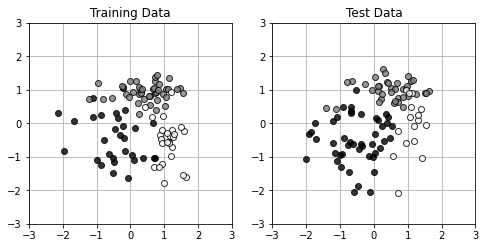

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# 데이터를 그리기 ------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none',
                 marker='o', markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)

# 메인 ------------------------------------
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)  #show data로 분포 표시용 함수를 만든다.
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)  #show data로 분포 표시용 함수를 만든다.
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

위 그래프 설명:3클래스 분류 문제의 인공데이터를 만든것



**3클래스 분류문제를 풀 네트워크 만들기**
*  2층의 피드포워드 신경망을 정의하는 함수 FNN
-FNN은 네트워크의 입력 x를 받아 y를 출력
-입력x는 D차원 벡터 /출력y는 K차원 벡터(D=2, K=3일 라고 가정하고 아래 식 진행) 

**네트워크함수의 설계**
*  N개의 데이터를 한꺼번에 처리하도록 설계
-x를 데이터 수 N * D차원의 행렬로 / y를 N *K차원의 행렬로
-벡터의 요소 y[n,0],y[n,1],y[n.2]는 x[n,:]이 클래스 0,1,2에 속할 가능성을 나타냄(모두더하면 1)
-중간층의 수와 출력의 차원을 자유롭게 바꿀수있도록 중간층의 수 M 출력의 차원수 K로 설정하여 네트워크의 인수로서 적용
-(N과D는 입력데이터x의 차원에서 아는 정보로 인수로 들어가지않음)
-네트워크의 동작을 결정하는 매개변수인 중간층 가중치 W와 ,출력층 가중치V도 네트워크에 전달
-W는 M *(D+1)행렬, V는 K *(M+1) 행렬(중간층의 바이어스뉴런을 고려하기때문)
-W와 V의 정보는 둘을 하나로합친벡터 WV로 전달

**wv 다음과 같이 설정**
$$wv=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])$$
* wv의 길이는 M*(D+1)+K(M+1)
-FNN의 추력은 N개의 데이터에 대응한 출력 y(N*K)행렬과, 중간층의 출력 z,출력층과 중간층의 입력총합a,b도 출력한다.->이들은 wv를 학습시킬때 사용한다.


In [ ]:
# 시그모이드 함수 ------------------------
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y
# 네트워크 ------------------------
def FNN(wv, M, K, x):
    N, D = x.shape # 입력 차원
    w = wv[:M * (D + 1)] # 중간층 뉴런의 가중치
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):] # 출력층 뉴런의 가중치
    v = v.reshape((K, M + 1))
    b = np.zeros((N, M + 1)) # 중간층 뉴런의 입력 총합
    z = np.zeros((N, M + 1)) # 중간층 뉴런의 출력
    a = np.zeros((N, K)) # 출력층 뉴런의 입력 총합
    y = np.zeros((N, K)) # 출력층 뉴런의 출력
    for n in range(N):
        # 중간층의 계산
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) #항상 1이 되는 더미입력을 x의 3번째 요소로 덧붙인 부분
            z[n, m] = Sigmoid(b[n, m])
        # 출력층의 계산
        z[n, M] = 1 # 더미 뉴런
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b
# test ---
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

위 값 설명

*   마지막 행은 동작 체크,m=2,k=3일때를 가정하여 wv는 길이가 2*3 +3*3=15인 가중치 벡터다
*   wv의 요소 모두를 1로 하여 입력으로는 x_train의 두 데이터만 입력했을때의 출력이 표시됨
-위에서부터 y,a,z,b의 값이다.



> 7.2.3수치 미분법





이제 네트워크에서 문제를 어떻게 풀지 생각해보자. 분류문제이므로 오차함수는 평균교차엔트로피 오차를 사용

$$E(w,v)=-\frac{1}{N}\displaystyle\sum_{n=0}^{n-1}\displaystyle\sum_{k=0}^{k-1}  {t_{nk}log(y_nk)}$$

*  위의 오차를 아래의 CE_FNN으로 구현

In [ ]:
# 평균 교차 엔트로피 오차 ---------
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    return ce

# test ---
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

**위의 함수 해석**
*  CE_FNN은 FNN과 마찬가지로 wv,네트워크의 크기를결정하는 m과k,입력데이터x와 목표데이터t를 입력
-내부에서 FNN이 x에대한 y를 출력하고 둘을 비교해 크로스엔트로피가 계산




#수치미분법?(numerical differentiation)
>> *  차분(임의의 두점에서의 함수값들의 차이)을 통해 미분(한점에서기울기)하는 것 "수치미분"

>>수치미분을 왜 사용할까?
*  해석적 미분(종이와 펜을 통해 논리적으로풀수있는)으로 풀 수 없는 문제가 있을때, 수치적 접근을 통해 근사값을 찾는 방식

>>수치미분의 단점,한계?
*  최종계산결과에 오차가 생김(rounding error) ex)소수점 8자리 이하가 생략되어 최종계산 결과에 오차가 발생하는경우
*  차분문제, 진정한 접선과 근사로 구한 접선 간의 불일치 문제

https://amber-chaeeunk.tistory.com/11


**경사하강법을 적용하려면 오차함수를 매개변수로 편미분한 식이 필요->but 미분계산을 성실하게하지않고,계산속도에 신경쓰지않는다면 간단한 수치적 미분으로 값을 구할 수 있음**

$$\frac{∂E}{∂w}\|_{w*}\simeq\frac{E(w^* +\epsilon)-E(w^* -\epsilon)}{2\epsilon}$$

*  하지만 실제 매개변수는 하나가 아니라 여러개다. $w0^*,w1^*,w2^*$라는 점에서 E(w0,w1,w2)의 기울기를 알려면  $w0^*,w1^*$는 그대로 고정하여 $w0^*$의 전 후로 ϵ 만큼 비켜놓은 두점의 기울기, w0에 대한 편미분을 근사한다.

$$\frac{∂E}{∂w}\|_{w_0^*,w_1^*,w_2^*}\simeq\frac{E(w_0^* +\epsilon,w_1^*,w_2^*)-E(w_0^* -\epsilon,w_1^*,w_2^*)}{2\epsilon}$$

*  w1,w2에 관해서도 위와 같이 매개변수를 고정하여 편미분을 구한다
-위 방법은 직감적으로 매개변수 공간의 현재 있는 지점에서 그 근방 오차함수의 크기를 찾아보고 오차함수가 어느방향으로 기울어져있는지를 확인하는 방법
-위 방법은 근사이지만 ϵ을 충분히 작게 취하기때문에, 근사치가 실제값에 충분히 가까워진다
-따라서 위 방법의 단점은 정밀도의 오차 보다는 "계산비용"에 있다.
-한 매개변수의 미분을 계산하기 위해 매개변수하나에 두번의 E 계산이 필요학 때문이다

**CE_FNN의 수치미분을 출력하는 함수 dCE_FNN_num를 만들자**

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


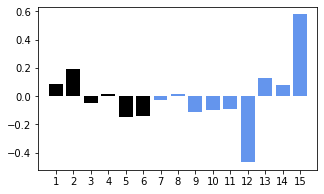

In [ ]:
# - 수치 미분 ------------------
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv
#--dVW의 표시 ------------------
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)
#-test----
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

위 함수 설명
*  ϵ은 위에서 0.001로 정의
-m=2,k=3일때 가중치를 임의로 생성하여 x_train,y_train의 두 데이터만 입력했을 때으 ㅣ동작체크 출력이 표시된다

위 그래프 설명
*  15개의 가중치 매개변수 각각에 대한 수치미분값이다. 후에있을 해석적미분결과와 비교할 예정



> 7.2.4 수치미분법에 의한 경사하강법

*  위에서 만든 함수를 바탕으로 분류문제를 "경사하강법"으로 풀어보자.
-함수이름은 Fit_FNN_num


#경사하강법?
>> *  경사법=기울기가 가리키는 방향으로 가서 다시 기울기를 구하는 행위를 반복하는것,즉 최솟값을 찾도록 노력하는 방법을 gradient method(경사법)이라고 한다.
*  경사하강법=경사법중에서 함수의 값이 하강하는 방향으로 가는 것이 경사하강법이다.



**Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha)**

*  위에서 볼수있듯 앞선 함수와 다르게 "입력"에 "학습시키는 가중치의 초기값"으로 **wv_init**를 넣는다
-훈련데이터 뿐만 아니라 테스트 데이터도 입력한다(학습단계별로 테스트데이터의 오차를 체크에 오버피팅을 확인하기위함)
-테스트데이터의 정보는 학습에 활용되지않도록 유의
-n=step의 수, alpha는 학습상수,출력은 최적화된 매개변수인 wvt

In [ ]:
import time
# 수치 미분을 사용한 구배법 -------
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n): # (A)
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test
# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000 # (B) 학습 단계
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:216.671 sec


위의 결과를 보면 실행시간이 표시됨. 
*  (a)에서 for 루프내 wvt를 dCE_FNN_num로 갱신하여 매번 훈련데이터의 오차와 테스트데이터의 오차를 계산하는 함수임.

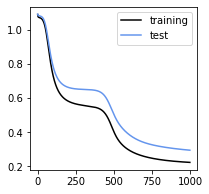

In [ ]:
# 학습 오차의 표시 ---------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label ='test')
plt.legend()
plt.show()

학습이 잘 이루어지고있다면, 훈련데이터의오차가 위와같이 단조롭게 감소하여 일정한 값에 수렴함을 확인 할 수 있다.
*  400단계 부근에서 학습이 수렴한듯 보이지만 다시 급격하게 학습이 진행되었다.. 

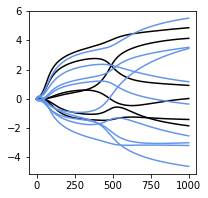

In [ ]:
# 가중치의 시간 변화의 표시 ---------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

위와 같이 가중치 시간의 변화를 플롯한 결과다
*  가중치W는 검정/출력층의 가중치v를 파란색으로 표시
-0주변의 기본값으로 시작된 가중치는 각각 특정값으로 서서히 수렴중
-자세히 살펴보면 400단계에서 각각의 가중치 그래프가 교차하고있음을 확인
- ->**가중치를 갱신하는 방향, 오차함수의 기울기의 바향이 변화됨을 의미**
-이는 가중치가 saddle point(안장점)에 도달했을 가능성을 암시

**saddle point?**
*  어느 방향으로는 계곡,어느방향으로는 산이 되는 지점
-가중치 공간이 15차원이므로 오차함수를 그릴수없지만, 2차원이라고 가정하고 그린다면 언덕길위의 지점이라고 이해하면 된다.
-경사하강법에 따라 가중치는 계곡의 중심을 향해 나아가고 있지만,중심에 가까울수록 기울기는 작아지고, 갱신도 느려진다
-그러나 어느정도 진행되면, 거기서 방향이 변화하고 갱신이 가속된다,

**신경망에 의해 만들어지는 오차함수의 지형은 복잡하다**
-비선형성(non-linear)

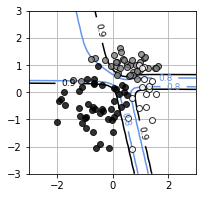

In [ ]:
# 경계선 표시 함수 --------------------------
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]  #1로 하면 오류나서 'F'로 변경
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.8, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    
    
# 경계선 표시 --------------------------
plt.figure(1, figsize=(3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

위 결과물은 학습에 사용하지않은 테스트데이터만 플롯
*네트워크가 각각의 클래스에 0.5 또는 0.9이상으로 판정한 영역의 경계를 표시




> 7.2.5 오차 역전파법



*  위와 같은 feedforward neural network에 학습시키는 방법으로 backpropagation이 유명
-backpropagation은 네트워크 출력에서 발생하는 오차정보를 사용하여 출력치의 가중치에서 주간층의 가중치로 입력방향의 반대로 가중치를 갱신해나간다.
-사실 backpropagation은 경사하강법이라고 볼수있다, 경사하강법을 feedforward neural network에 적용하면 오류역전파법이 자연스럽게 도출되기 때문이다.

**경사하강법을 사용하기위해 오차함수를 매개변수로 편미분하자**
$$E(w,v)=-\frac{1}{N}\displaystyle\sum_{n=0}^{n-1}\displaystyle\sum_{k=0}^{k-1}  {t_{nk}In(y_nk)}->E(w,v)=\frac{1}{N}\displaystyle\sum_{n=0}^{n-1}E_n(w,v)$$

*  평균상호엔트로피 오차는 데이터 각각의 상호엔트로피 오차의 평균으로 해석됨
-경사하강법에서 사용하는 E의 매개변수의 편미분은,합과 미분의 교환법칙에 의해 계산해 본래 목적인 $∂E/∂W_{ji}$를 구할 수 있다.식은 다음과같다

$$\frac{∂E}{∂W_i}=\frac{∂}{∂W_{ji}}\displaystyle\sum_{i=0}^{N-1} E_n =\displaystyle\sum_{i=0}^{N-1} \frac{∂E_n}{∂W_{ji}}$$

*  네트워크 매개변수는 w말고v도 있다
- 여기서는 D=2,M=2,K=3일 경우를 가정한다.
- $E_N$을 $V_{KJ}$로 편미분한 식을 구하고->$E_n$을 $w_{kj}$로 편미분한 식을 구하는 순서로 유도한다.



> 7.2.6 $∂E_n/∂v_{kj}$를 구하기



1.편미분의 연쇄법칙을 사용해 $∂E_n/∂v_{kj}$를 두미분의 곱으로 분해
$$\frac{∂E}{∂v_{kj}}=\frac{∂E}{∂v_{k}}\frac{∂v_{k}}{∂v_{kj}}$$

2.먼저 처음부분의 $∂E/∂a_{k}$ ,k=0인 경우를 찾아보자, 앞선 식을 사용하여 E부분을 다시적으면 이와 같고 t와 y에서 쓸 수 있다.
$$\frac{∂E}{∂a_0}=\frac{∂}{∂a_0}(-t_0 logy_0 -t_1 logy_1 -t_2 logy_2)$$

3.위에서 $t_k$는 지도신호이기때문에 입력총합$a_0$으로 변하는것은 아니지만, 네트워크의 $y_k$와 입력총합 $a_0$와 관련이 깊다. 따라서$t_k$를 상수, $y_k$는 $a_0$의 함수로 확장하면 다음과 같은 식을 얻을수 있다.
$$\frac{∂E}{∂a_0}=-t_0\frac{1}{y_0}\frac{∂y_0}{∂a_0}-\frac{1}{y_1}\frac{∂y_1}{∂a_1}-\frac{1}{y_2}\frac{∂y_2}{∂a_2}$$

4.위 식의 1항의 ∂y_0/∂a_0 부분은 y가 a의 소프트맥스함수로 만들어져있기때문에 변형할수있다. 2항,3항도 마찬가지

ex)1항
$$\frac{∂y_0}{∂a_0}=y_0(1-y_0)$$

5.따라서 3번식은 이렇게 정리할 수 있다.
$$\frac{∂E}{∂a_0}=y_0(1-y_0) + t_1y_0 +t_2y_0=y_0-t_0$$

6.앞선 과정을 k=1,k=2일때 처럼 구할 수 있다.
*  k=1
$$\frac{∂E}{∂a_1}=y_1-t_1$$
*  k=2
$$\frac{∂E}{∂a_2}=y_2-t_2$$

7.이렇게되면 1번과정의 첫부분을 이와같이 나타낼수있다.->이는 출력층(2층)의 오차를 나타내므로 왼쪽식을 오른쪽으로 나타낼수있다.
$$\frac{∂E}{∂a_{k}}=y_k-t_k => 	\delta_k^{(2)}$$

7-1.만약 7번에서 오차함수에 제곱오차를 사용하면 식이 다음과같이 달라진다.
$$\frac{∂E}{∂a_{k}}=\delta_k^{(2)} =(y_k-t_k)h^{'}(a_k)$$

8.1번으로 돌아가서 이번에는 후반부의 $\frac{∂v_{k}}{∂v_{kj}}$를 생각하자. k=0일때 경우의 $a_0$은 다음과 같다.

$$a_0 = v_{00}z_0 +v_{00}z_0+v_{00}z_0$$

9.위 식을 정리하여 쓰면 다음과 같다.k=1,k=2일때도 사용하도록 왼쪽식을 오른쪽과같이 바꾸어준다.
$$\frac{∂a_0}{∂v_{0j}}=z_j => \frac{∂a_k}{∂v_{kj}}=z_j $$

10.7번까지 해서 구한식과 9번의 식을 합친다.
$$\frac{∂E}{∂v_{kj}}=\frac{∂E}{∂v_{k}}\frac{∂v_{k}}{∂v_{kj}} = (y_k-t_k)z_j=\delta_k^{(2)}z_j$$




**위 복잡한 과정의 결과, 갱신규칙식은 다음과 같다.**
$$v_{kj}(t+1)=v_{kj}(t)-α\frac{∂E}{∂v{kj}}=v_{kj}(t)-α\delta_k^{(2)}z_j$$

**그렇다면 경사하강법으로 도출된 위 식의 의미를 생각해보자**
*  가중치$v_{kj}$는 중간층(1층)의 뉴런 j에서 출력층(2층)의 뉴런 k에 정보를 전달하는 결합의 가중치다.
-결합의 변경의 크기는 입력크기 $z_j$와 그앞에 생기는 오차 $ \delta_k^{(2)}$의 곱으로 결정된다는 것을 의미한다.
-물론 오차  $ \delta_k^{(2)}$ 는 양수 음수 0도 존재하지만 우리의 예시에서 z_j=σ(b_j)이므로 항상 0~1 사이의 양수값을 취한다.

**위 갱신규칙식을 해석해보면**
*  출력 $y_k$가 목표데이터 $t_k$와 일치하는경우 오차는 $ \delta_k^{(2)}=(y_k-t_k)=0$이 되므로 $-α\delta_k^{(2)}z_j=0$이 된다.
-$z_j$는 항상 양수이기때문에 $-α\delta_k^{(2)}z_j$는 음수
-$v_{kj}$는 감소하는 방향으로 변경된다
-즉 출력이 너무 커서 오차가 발생했기때문에 뉴런$z_j$의 영향을 줄이는 방향으로 가중치가 변경되었다고 해석할 수 있다. 
-입력$z_j$가 큰 경우에 결합의 출력에 크게 기여하므로 $v_{kj}$ 의 변화량도 그만큼 커진다고 해석할 수 있다.

> 7.2.7 $∂E_n/∂w_{ji}$를 구하기

**입력층에서 1층의 가중치 매개변수 $w_{ji}$의 학습 법칙을 도출하자**

*  앞선 7.2.6 처럼 오차함수E를 $w_{ji}$로 편미분하면 된다.

1.편미분의 연쇄법칙을 이용해서 $∂E/∂w_{ji}$를 분해한다.
$$\frac{∂E}{∂w_{ji}}=\frac{∂E}{∂b_j}\frac{∂b_j}{∂w_{ji}}$$

2.처음의 중간층 뉴런의 입력총합인 $b_j$ 에서 편미분 $\frac{∂E}{∂b_j}$ 를, 앞서 정의한 출력층의 오차식과의 유사성을 바탕으로, 식을 도출해낸다.(왼쪽->오른쪽)
$$  \frac{∂E}{∂a_k}=\delta_k^{(2)}=> \frac{∂E}{∂b_j}= \delta_j^{(1)}$$
*  여기서 1은 1층(중간층)임을 의미한다.2층도 그대로 대입..하면된다.

3.따라서 $w_{ji}$의 갱신규칙은 다음과 같다.
$$w_{ji}(t+1)=w_{ji}(t) - α\frac{∂E}{∂w_{ji}} = w_{ji}(t) -α \delta_j^{(1)}x_i$$

*  이전 장에서 구한 갱신규칙과 같은 모양이다.
*  즉 $w_{ji}$도 결합 전에 발생한 오차와, 결합 본래의 입력에 비례하는 형태로 변경된것으로 나타났다.


**하지만 우리는 아직 $\delta_j^{(1)}$ 가 무엇인지 모른다.**

1.$\delta_j^{(1)}$를 연쇄규칙을 사용해 전개한다.
$$\delta_j^{(1)} = \frac{∂E}{∂b_j} = \left\{ \displaystyle\sum_{k=0}^{k-1} \frac{∂E}{∂a_k}\frac{∂a_k}{∂z_j} \right\}\frac{∂z_j}{∂b_j}$$

2.분해한 첫번째 $\frac{∂E}{∂a_k}$는 정의에 의해 $\delta_j^{(2)}$로 나타낼 수있다.

3.두번째$\frac{∂a_k}{∂z_j}$는 아래와 같이 나타낼 수 있다.
$$\frac{∂a_k}{∂z_j} = \frac{∂}{∂z_k}\displaystyle\sum_{j=0}^{M}v_{kj}z_j=v_{kj}$$

4.따라서 식은 이와같이 정리된다.
$$\delta_j^{(1)} = h^{'}(b_j) \displaystyle\sum_{k=0}^{k-1}v_{kj}\delta_j^{(2)}$$

**위 식을 자세히 살펴보자**
*  처음의 $h^{'}(b_j)$는 활성화 함수의 미분, 항상 양수다.
-다음 합에는 대상의 오차인 $\delta_j^{(2)}$를 $v_{kj}$의 가중치로 모은다.
-즉 $\delta_j^{(1)}$는 결합한 고에서 생긴 오차 $\delta_j^{(2)}$를 반대방향으로 전달시켜 계산한다고 볼 수 있다.

우리의 예시는 2층짜리 네트워크만 표현했지만, **오류역전파는 네트워크계층이 더 들어도 앞선 법칙들을 사용하여 간단하게 "가중치매개변수의 학습법칙"을 도출**할수있다.

 **이러한 특성으로 feedforward neuralnetwork의 경사하강법=오류역전파라고 불린다.**

**네트워크 매개변수의 갱신방법 정리**

1.네트워크에 x 입력 y를 출력으로 얻는다.(중간에 계산된 b,z,a를 저장)
2.출력 y를 목표데이터 t와 비교해 그 오차(차이)를 계산한다. 이 오차는 출력층의 각 뉴런에 할당된다.
3.출력층의 오차를 사용해 중간층의 오차를 계산한다.
4.결합 본래의 신호 강도와 결합처의 오차 정보를 사용하여 가중치 매개변수를 갱신한다.

*  위 절차는 데이터 하나에 대한 갱신이다. 우리는 N개의 데이터를 다룰것이므로, 데이터를 하나씩 바꾸면서 1~4의 절차를 N번 처리해야한다.
</br></br>

**그렇다면 3층 4층등 층이 여러개인 경우는 어떤 규칙을 이끌어낼 수 있는가?**
*  놀랍게도, 앞선 2층과 똑같은 형태가 된다.
-층이 많은 경우 2,3의 단계를 사용하여 출력쪽에 가까운 층에서 입력쪽을 향해 차례로 각 뉴런의 오차를 계산하면된다.
-4에서 각각의 가중치를 결합이전 뉴런으 활성과 결합후, 오차정보를 사용해 바꿔나가면 된다,
</br></br>

**식으로서 확인해보자면**

*  1~4를 N개의데이터에 대해 반복(이것이 학습 1단계)
</br>
1.입력을 넣어 출력을 얻음
$$b_j =\displaystyle\sum_{i=0}^{D}w_{ji}x_i$$
$$z_j=h(b_j)$$
$$a_k=\displaystyle\sum_{j=0}^{M}v_kz_j$$
$$y_k = exp(a_k),\sum_{l=0}^{K-1} exp(a_l)$$

2,3.각 뉴런의 오차를 얻음
$$δ_k^{(2)} =y_k-t_k$$
$$δ_k^{(1)} =h(b_j)\displaystyle\sum_{K=0}^{K-1}v_{kj}δ_k^{(2)}$$

4.가중치를 갱신함
$$v_{kj}(t+1)=v_{kj}(t)-α\frac{δ_k^{(2)}z_j}{N}$$
</br>
$$w_{kj}(t+1)=w_{kj}(t)-α\frac{δ_k^{(1)}x_i}{N}$$



> 7.2.8 오류역전파(오차역전파)법의 구현

*  함수이름 =dCE_FNN
-입력하는 정보는 앞서 CE_FNN와 동일
-각 편미분은 밑의 코드에서 dw,dv로 표현됨->함수의 출력은 이들을 결합한 dwv로 한다.

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


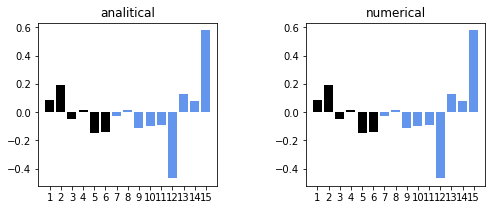

In [ ]:
# -- 해석적 미분 -----------------------------------
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wv을 w와 v로 되돌림
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    # ① x를 입력하여 y를 얻음
    y, a, z, b = FNN(wv, M, K, x)
    # 출력 변수의 준비
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)
    for n in range(N): # (A)
        # ② 출력층의 오차를 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # ③ 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # ④ v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # ④ w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), \
                dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv

#------Show VW
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3],
            align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)
      
#-- 동작 확인
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)

plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

위의 코드 부가설명
* 왼쪽은 해석적 미분, 오른쪽은 수치 미분의 결과를 출력한것이다.why?
*  동작 확인을 위해 임의로 생성한가중치매개변수wv에 대한 해석적 미분값 dWV_ana 을 출력한다. 이전에 작성한 수치미분값 dWV_num 도 표시한다.

-왼쪽의 해석적 미분값은 이전장에서 계산한 오른쪽의 수치미분값과 거의 일치한다.
-그래프도 유사한것으로 보아 제대로 계산되었음을 확인할 수 있다.
-위 코드에서 1~4의 절차는 (a)에서 N번반복되고 , 각 반복에서 얻은 dv를 모두 합쳐 평균을 계산한다. dw도 동일하다.

**이제 수치미분으로 풀어본 분류 문제를 오류 역전파로 풀어보자**
*  Fit_FNN은 수치미분의 경우 Fit_FNN_num 과 거의 동일
-코드는 앞선 수치미분 dCE_FNN_num->dCE_FNN으로 대체함(차이점)

In [ ]:
import time
# 해석적 미분을 사용한 구배법 -------
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:25.824 sec


앞서 수치미분에 비해 계산속도가 빠르다!

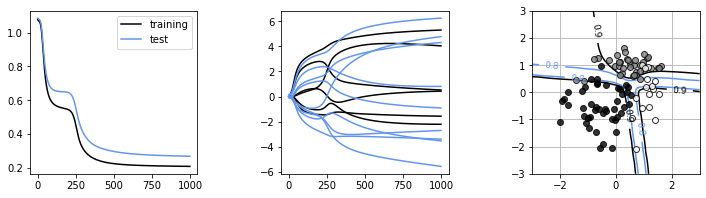

In [ ]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
# 학습 오차의 표시 ---------------------------
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
# 가중치의 시간 변화 표시 ---------------------------
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

결과는 앞선 수치미분과 거의 동일하다.

**그렇다면 계산속도가 느린 수치미분은 사용할곳이 없는것인가?**

*  아니다. 수치미분은 도출된 미분방정식이 맞는지 확인하는 강력한 확인수단이 된다.

**앞서 공부한 과정을 정리**

*  네트워크 매개변수를 구하는 프로그램 =Fit_FNN
-x_train,t_train에서 wv를 학습시키고 x_test,t_test 에서 평가
-이 가운데 크로스엔트로피를 줄이는 wv를 구하기 위해, CE_FNN(크로스엔트로피를 구하는) 과 DCE_FNN(미분)이 사용되었음
-두 함수에서 FNN(네트워크의 출력)이 사용되었음
-FNN에는 중간층 뉴런의 활성화 함수로 SIGMOID 가 사용되었음





> 7.2.9 학습 후 뉴런의 특성

*  2층의 네트워크는 곡선의 경계선을 어떻게 만들었을까? 

*  $b_j,z_j,a_k,y_k$의 특성을 시각화해 알아보자



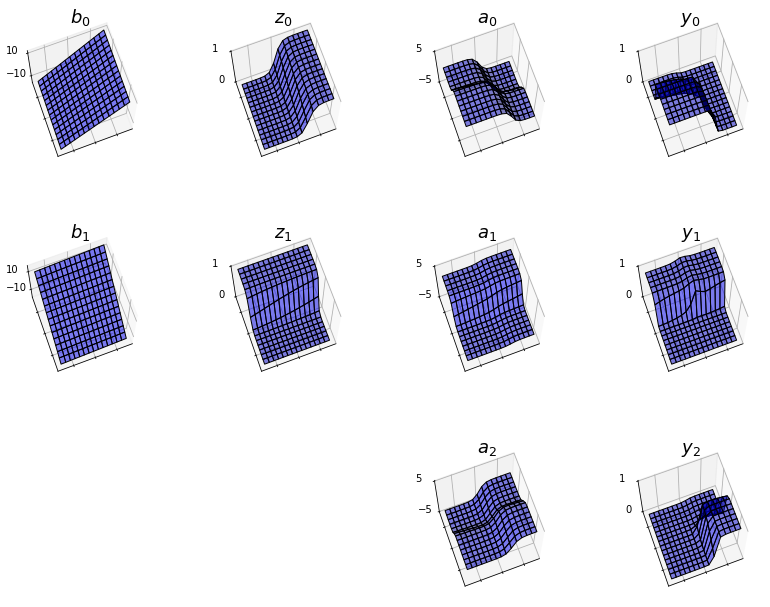

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black',
                    rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)
  
M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
y, a, z, b = FNN(WV, M, K, x)


fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))
     
for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))

plt.show()

위 시각화 자료 해석
*  첫번째 열 = 중간층-입력총합
-두번째 열 = 중간층-출력
-세번째 열 = 출력층-입력총합
-네번째 열 =출력층-출력

**구현이 어려운 설명 부분은 책 313페이지 참고할것**

# **7.3 케라스로 신경망 구현**



#케라스를 잘 몰라서 정리하는, 파이토치와 다른 케라스의 장점
>>*  동일한 코드로 cpu,gpu에서 실행가능
*  사용하기쉬운 api를 바탕으로 딥러닝모델의 프로토타입을 빠르게만들수있음
*  어떤 네트워크 구조도 만들수있으며, 상업적인 프로젝트에도 자유롭게 사용가능

#케라스 모델을 정의하는 2가지방법
>>*  sequential class : 순서대로 층을 쌓아올리는 경우 사용
*  함수형 API : 임의의 구조를 만들 수 있는 비순환 유향 그래프



> 7.3.1 2층 피드 포워드 신경망 

3분류 문제를 푸는 2층 피드포워드 네트워크 만들기



In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow 
np.random.seed(1) # (A)난수초기화->돌릴때마다 같은 결과값
import tensorflow.keras.optimizers #import keras.optimizers # (B)
from keras.models import Sequential # (C)
from keras.layers.core import Dense, Activation #(D)

# 데이터 로드 ---------------------------
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [ ]:
# 데이터를 그리기 ------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none', marker='o',
                 markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)

In [ ]:
np.random.seed(1)# 난수 초기화

# --- Sequential 모델 작성
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform')) # (A)
model.add(Dense(3,activation='softmax',
                kernel_initializer='uniform')) # (B)
sgd = tensorflow.keras.optimizers.SGD(learning_rate=1, momentum=0.0,
                           decay=0.0, nesterov=False) # (C)
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy']) # (D)
# ---------- 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test)) # (E)


# ---------- 모델 평가
score = model.evaluate(X_test, T_test, verbose=0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'\
      .format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

cross entropy 0.27, accuracy 0.90
Calculation time:18.640 sec




> 7.3.2 케라스 사용의 흐름



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow 
np.random.seed(1) # (A)난수초기화->돌릴때마다 같은 결과값
import tensorflow.keras.optimizers #import keras.optimizers # (B)
from keras.models import Sequential # (C)
from keras.layers.core import Dense, Activation #(D)

# 데이터 로드 ---------------------------
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [ ]:
import tensorflow.keras.optimizers #import keras.optimizers
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 

In [ ]:
#model은 시퀀셜 클래스에서 생성된 객체
model=Sequential()

In [ ]:
#dense의 첫번째 인자 2=뉴런이 2개
#dense의 네번째 인자 'uniform' =가중치 매개변수의 초기값을 균일난수(uniform random number)로 결정하라는 의미다. 더미입력(바이어스)은 기본적으로 설정되어있다.
model.add(Dense(2,input_dim=2,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
#출력층도 dense로 정의
model.add(Dense(3,input_dim=2,activation='softmax',kernel_initializer='uniform'))

In [ ]:
#학습방법의 설정->sgd에 넣음
sgd = tensorflow.keras.optimizers.SGD(learning_rate=1, momentum=0.0,decay=0.0, nesterov=False)

In [ ]:
#'categorical_crosentropy'=목적함수 교차엔트로피 오차
#metrics=['accuracy']=학습의평가,정답률(accuracy계산)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#실제학습은 fit으로 진행
history=model.fit(X_train,T_train,batch_size=100,epochs=1000,verbose=0,validation_data=(X_test,T_test))

In [ ]:
#모델 평가
score = model.evaluate(X_test, T_test, verbose=0) # (F)
print('loss{0:f}, acc{1:f}'.format(score[0],score[1]))

loss0.266845, acc0.900000


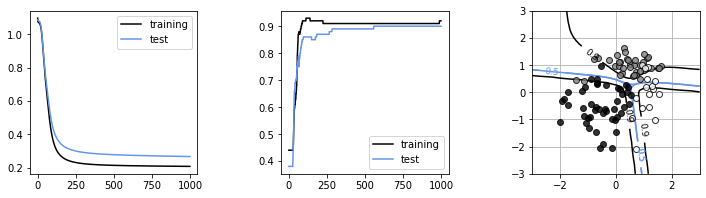

In [ ]:
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace=0.5)

# 학습 곡선 표시 --------------------------
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='training') #훈련데이터의 교차엔트로피오차의 시계열 정보 
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test') #훈련데이터의 교차엔트로피오차
plt.legend()

# 정확도 표시 --------------------------
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label='training') #훈련데이터의 정답률
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label='test') #테스트데이터의 정답률
plt.legend()

# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
y = model.predict(x) #학습이 완료된 모델에 의한 임의의 x에대한 예측을 얻을수있는 코드
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=[
        'cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()

*  왼쪽 그래프=오차함수의 시간변화
-가운데 그래프=정답률의 시간변화
-오른쪽그래프=학습에서 얻어진 클래스간의 경계선